In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression


#### Import the dataset from csv to dataframe

In [2]:
dataset = pd.read_csv('churn.csv')
dataset.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

#### Check for missing values in the dataset

In [4]:
print(dataset.isnull().sum())

state                            0
account_length                   0
area_code                        0
phone_number                     0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
class                            0
dtype: int64


Removed the categorical columns from the dataset and saved the rest in ```numeric_attrb_dataset``` dataframe.

In [5]:
numeric_attrb_dataset = dataset.drop([
"state",
"account_length",
"area_code",
"phone_number",
"international_plan",
"voice_mail_plan",
"class"
], axis=1)
numeric_attrb_dataset.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


#### Check the main statistical parameters of the dataset.

In [6]:
numeric_attrb_dataset.describe()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### Normalize the data

Since the standard deviation varies from ~0.7 to ~53, i decided to normalize the data.
To do this I have used StandardScaler.

In [7]:
normalizer = StandardScaler()
normalized_data = normalizer.fit_transform(numeric_attrb_dataset)
normalized_data

array([[ 1.27314513,  1.57380195,  0.50282376, ..., -0.58423577,
        -0.0955088 , -0.43667564],
       [ 1.3469729 , -0.34680162,  1.1584221 , ..., -0.58423577,
         1.24598231, -0.43667564],
       [-0.57254912,  1.17112468,  0.70454633, ...,  0.22991664,
         0.69597096, -1.20223603],
       ...,
       [-0.57254912, -0.7364893 , -0.55621972, ..., -0.17715957,
         1.20573758, -0.43667564],
       [-0.57254912,  0.15793671, -1.66569384, ...,  0.63699285,
        -0.63210525, -1.20223603],
       [ 1.93759506, -0.94432273,  0.09937862, ...,  4.70775494,
        -0.35039211, -1.20223603]])

#### Create the main dataset to use for model training

In [8]:
# Convert the numpy array to a pandas dataframe
target = dataset['class']
attributes = pd.DataFrame(normalized_data,
                          columns=["number_vmail_messages",
                                   "total_day_minutes",
                                   "total_day_calls",	
                                   "total_day_charge",	
                                   "total_eve_minutes",	
                                   "total_eve_calls",	
                                   "total_eve_charge",
                                   "total_night_minutes",
                                   "total_night_calls",	
                                   "total_night_charge",	
                                   "total_intl_minutes",
                                   "total_intl_calls",
                                   "total_intl_charge",
                                   "number_customer_service_calls"
])

attributes.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1.273145,1.573802,0.502824,1.574074,-0.064032,-0.060077,-0.063849,0.876999,-0.446928,0.876286,-0.094809,-0.584236,-0.095509,-0.436676
1,1.346973,-0.346802,1.158422,-0.347082,-0.101621,0.141693,-0.101089,1.068992,0.154374,1.069818,1.245227,-0.584236,1.245982,-0.436676
2,-0.572549,1.171125,0.704546,1.171286,-1.571562,0.494791,-1.572084,-0.748012,0.204483,-0.746737,0.701969,0.229917,0.695971,-1.202236
3,-0.572549,2.210292,-1.463971,2.210457,-2.744745,-0.614946,-2.745155,-0.069110,-0.547145,-0.069377,-1.326194,1.044069,-1.329681,0.328885
4,-0.572549,-0.252163,0.654116,-0.252115,-1.035419,1.100103,-1.034426,-0.267041,1.056327,-0.267307,-0.058592,-0.584236,-0.055264,1.094445


In [9]:
# Concat the normalized data with the target class 
main_dataset = attributes
main_dataset["class"] = target
main_dataset.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,1.273145,1.573802,0.502824,1.574074,-0.064032,-0.060077,-0.063849,0.876999,-0.446928,0.876286,-0.094809,-0.584236,-0.095509,-0.436676,0
1,1.346973,-0.346802,1.158422,-0.347082,-0.101621,0.141693,-0.101089,1.068992,0.154374,1.069818,1.245227,-0.584236,1.245982,-0.436676,0
2,-0.572549,1.171125,0.704546,1.171286,-1.571562,0.494791,-1.572084,-0.748012,0.204483,-0.746737,0.701969,0.229917,0.695971,-1.202236,0
3,-0.572549,2.210292,-1.463971,2.210457,-2.744745,-0.614946,-2.745155,-0.069110,-0.547145,-0.069377,-1.326194,1.044069,-1.329681,0.328885,0
4,-0.572549,-0.252163,0.654116,-0.252115,-1.035419,1.100103,-1.034426,-0.267041,1.056327,-0.267307,-0.058592,-0.584236,-0.055264,1.094445,0


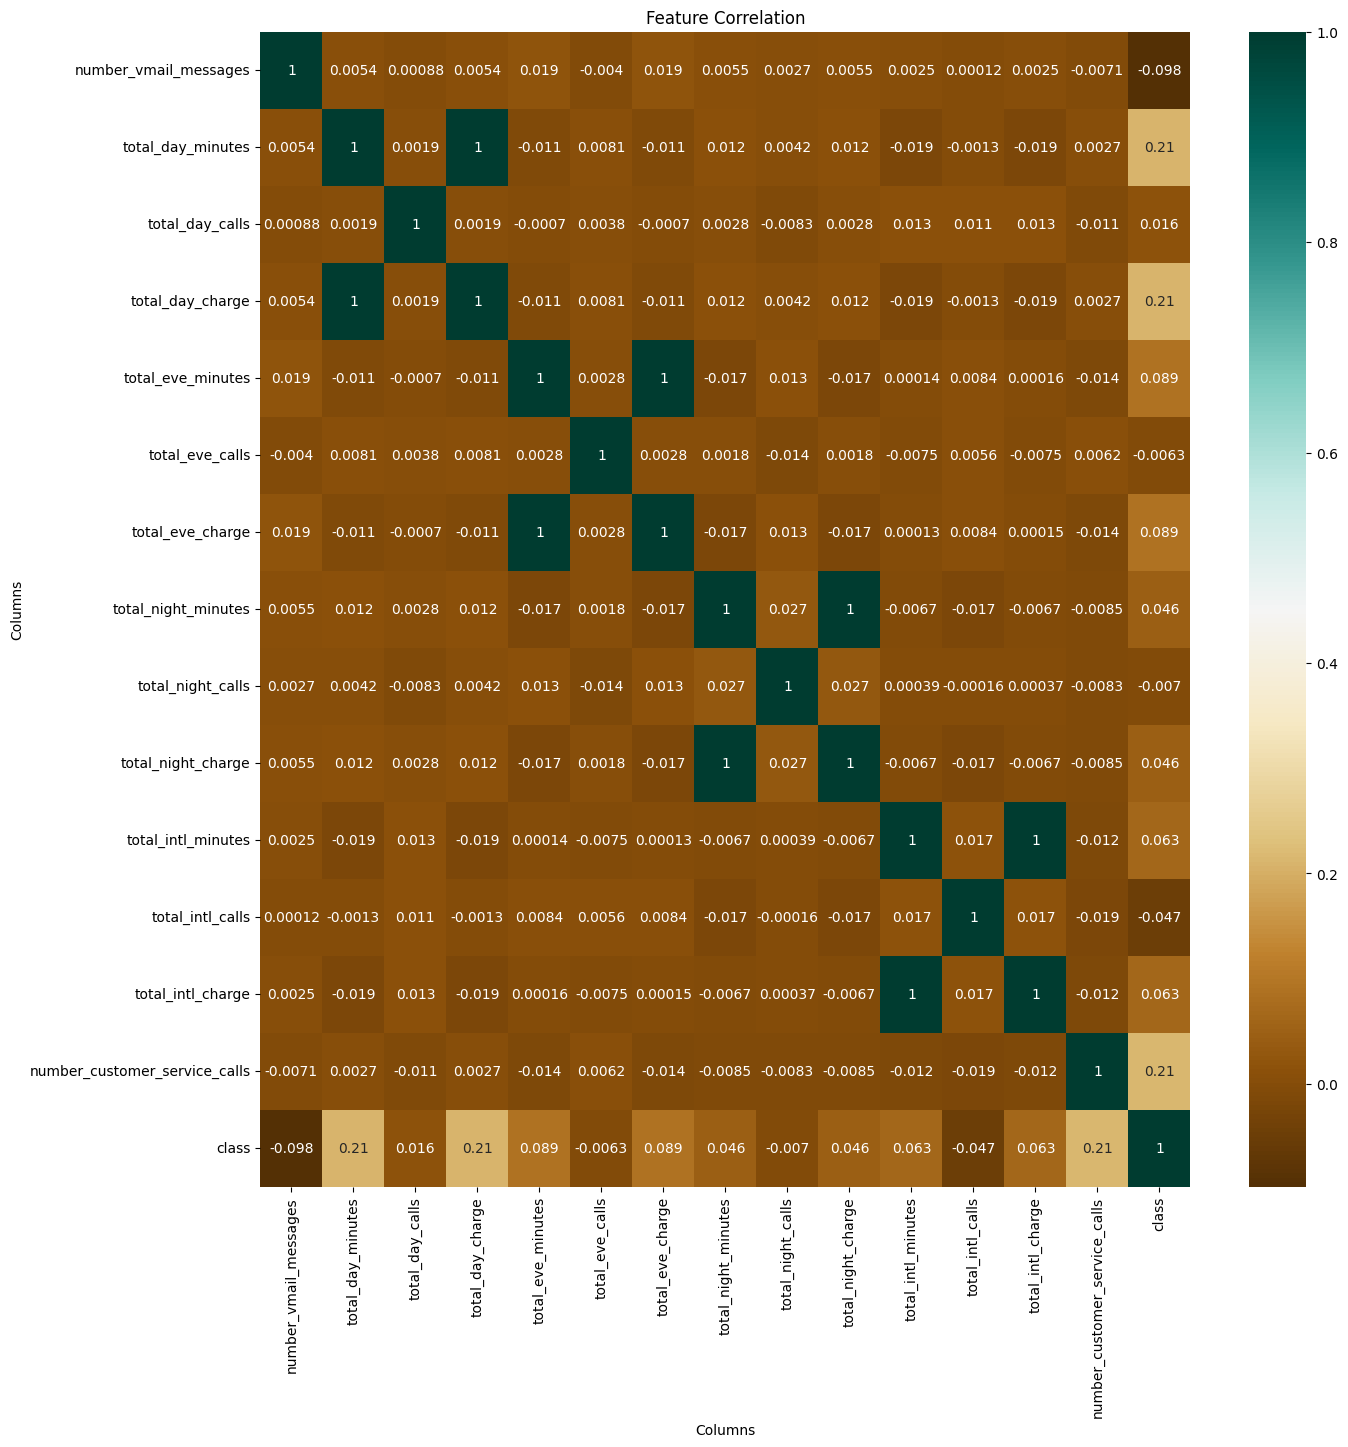

In [10]:
# correltion heatmap
# Check the correlation between the quantitivve atrribytes and the class column
ds = numeric_attrb_dataset
ds["class"] = target
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(ds.corr(), annot=True, ax=ax, cmap='BrBG').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

Describe which of the attributes have poritive/negative strong/weak correlation.
however, I will feed the whole dataset to the machine learning model.






#### Split the data in train and test

In [11]:
target_class = main_dataset["class"]
other_columns = main_dataset.drop(['class'], axis=1)


other_columns_train, other_columns_test, target_class_train, target_class_test = train_test_split(other_columns,target_class, test_size=0.2)

Train a Logistic Regression Model

In [12]:
lrm = LogisticRegression()
lrm.fit(other_columns_train,target_class_train)

LogisticRegression()

In [13]:
# Make a prediction
lrm_prediction = lrm.predict(other_columns_test)
# lrm_prediction

In [14]:
# Evaluate the models accuracy
print('Logistic Regression Performance:\n')
lrm_mae = metrics.mean_absolute_error(target_class_test, lrm_prediction)

print('MAE:', lrm_mae)

Logistic Regression Performance:

MAE: 0.125


~13% is the probability for a wrong prediction. This means the model makes a decent prediction.